<a id ='2' ></a>
<h1 style = "color:crimson;border:0;font-family:serif;font-weight:bold">1. Loan Prediction System 📚</h1> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Loading and Exploring the data

In [2]:
train_data = pd.read_csv("dataset/train.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


* Loan ID = Unique ID for each loan.
* Gender = Gender of a person or customer
* Married = Marital status of a customer
* Dependents = Whether the customer depends on another person for source of income or what ( it is categorical 0 or 1)
* Education = A Graduate or Not
* Self-Employed = Whether a customer is self-employed or not
* ApplicantIncome = Income of the applicant or the person who wants the loan
* CoApplicantIncome = Income of the partner
* LoanAmount = the amount of loan a customer wants
* LoanAmountTerm = the number of months or years a customer can take to repay the loan
* Credit_History = Whether a customer has credit history or doesn't
* Property_area = the location of the customer
* Loan_Status = Indicates whether the customer loan is approved or not

In [4]:
print(train_data.shape)

(614, 13)


There are 614 rows and 13 columns in this data

In [5]:
### For Numerical values
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 3. Working with Missing Values

In [7]:
def missing_values(df):
    a = num_null_values = df.isnull().sum()
    return a

In [8]:
missing_values(train_data)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train_data.drop(["Loan_ID", "Dependents"], axis=1, inplace=True)

In [10]:
train_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Dealing with null values [Categorical]

In [11]:
cols = train_data[["Gender", "Married", "Self_Employed"]]
for i in cols:
    train_data[i].fillna(train_data[i].mode().iloc[0], inplace=True)

In [12]:
train_data.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Dealing with null values [Numerical]

In [13]:
n_cols = train_data[["LoanAmount", "Loan_Amount_Term", "Credit_History"]]
for i in n_cols:
    train_data[i].fillna(train_data[i].mean(axis=0), inplace=True)

## 4. Visualizations 

In [14]:
def bar_chart(col):
    Approved = train_data[train_data["Loan_Status"]=="Y"][col].value_counts()
    Disapproved = train_data[train_data["Loan_Status"]=="N"][col].value_counts()

    df1 = pd.DataFrame([Approved, Disapproved])
    df1.index = ["Approved", "Disapproved"]
    df1.plot(kind="bar")

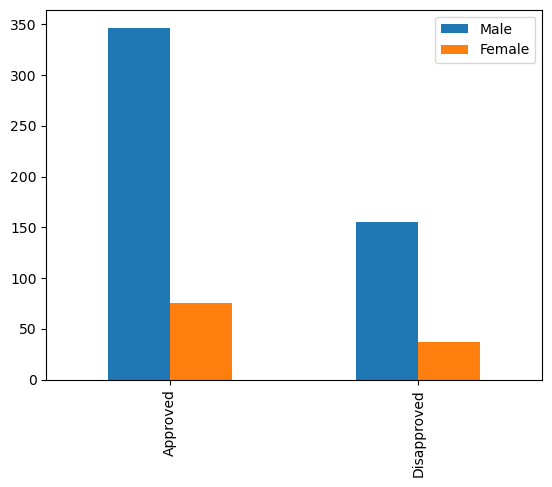

In [15]:
bar_chart("Gender")

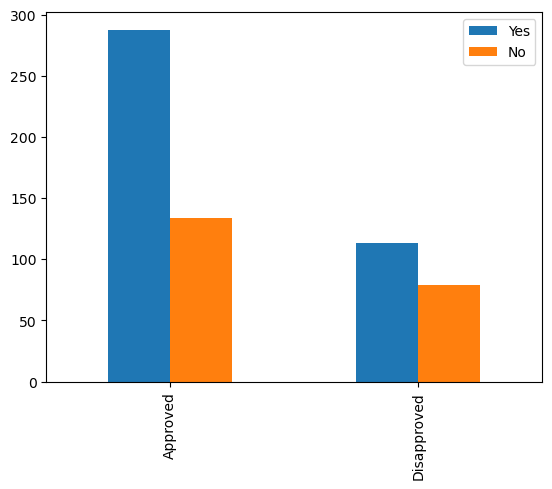

In [16]:
bar_chart("Married")

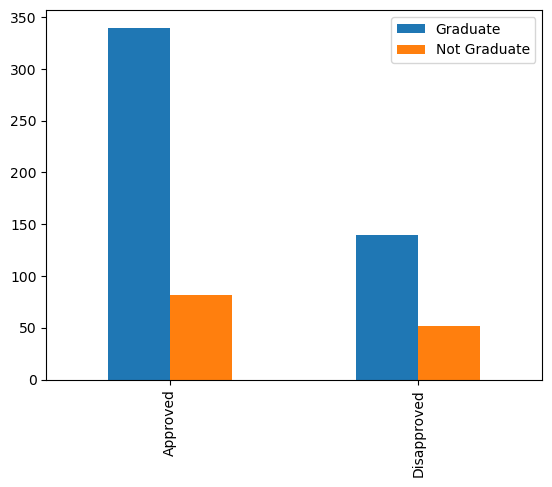

In [17]:
bar_chart("Education")

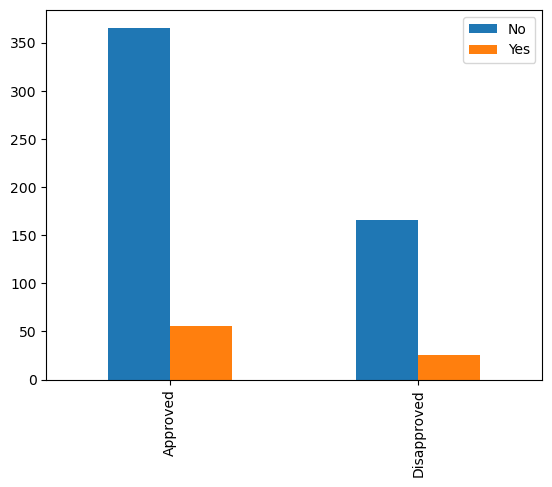

In [18]:
bar_chart("Self_Employed")

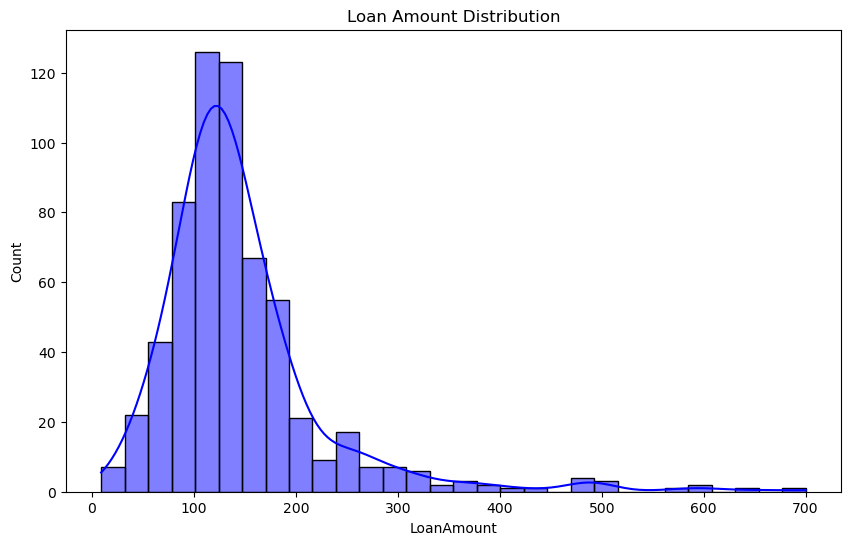

In [52]:

# Data Distribution Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(train_data['LoanAmount'].dropna(), kde=True, bins=30, color='blue')
plt.title('Loan Amount Distribution')
plt.show()


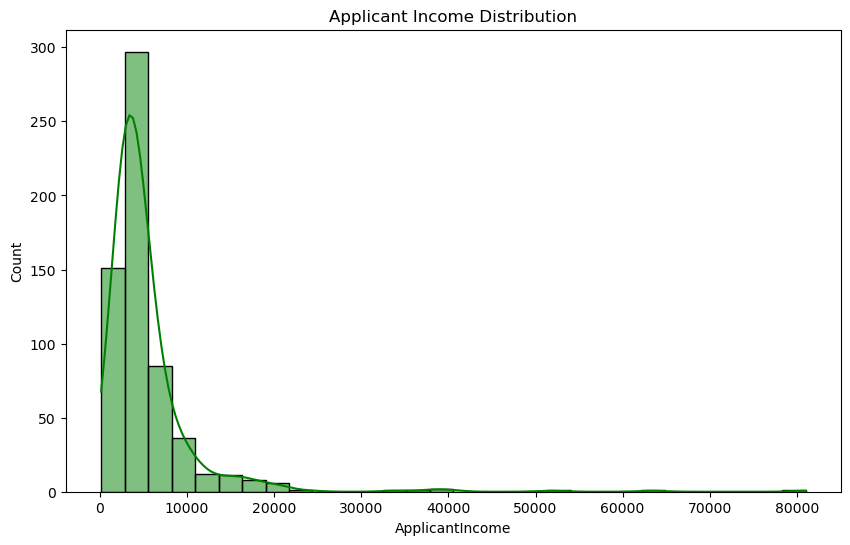

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['ApplicantIncome'], kde=True, bins=30, color='green')
plt.title('Applicant Income Distribution')
plt.show()

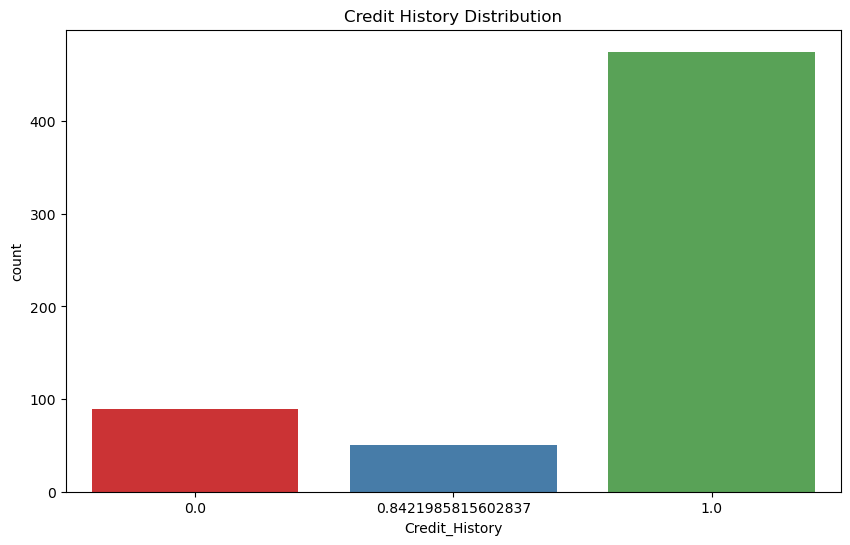

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_History', data=train_data, palette='Set1')
plt.title('Credit History Distribution')
plt.show()

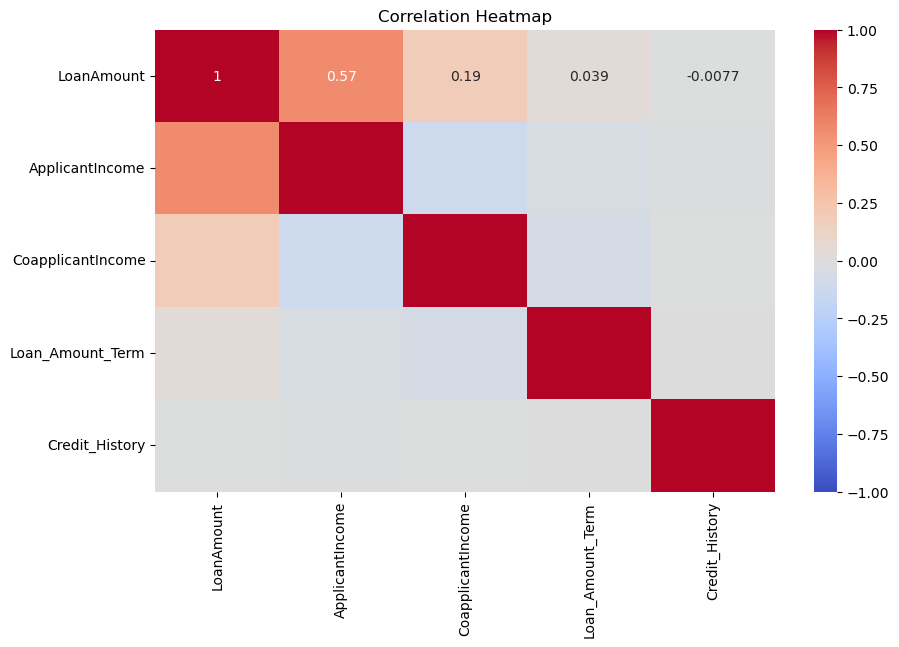

In [55]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_data[['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## 5. Encoding the categorical data

In [19]:
from sklearn.preprocessing import OrdinalEncoder 

ord_enc = OrdinalEncoder() 
train_data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']] = ord_enc.fit_transform(train_data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']])
train_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [20]:
train_data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']] = train_data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']].astype('int')

In [21]:
train_data.head(15)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,1,1,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,1,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,1,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,1,1,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


## 6. Model Development

##### Dividing the data

In [22]:
from sklearn.model_selection import train_test_split  
X = train_data.drop("Loan_Status", axis=1) 
y = train_data["Loan_Status"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2) 

In [23]:
print(X_train.shape) 

(491, 10)


The size of training data set is 491

In [24]:
print(y_train.shape)

(491,)


In [25]:
print(X_test.shape) 

(123, 10)


In [26]:
print(y_test.shape)

(123,)


The size of test data set is 123

##### Using the Guassian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB 

gfc = GaussianNB() 
gfc.fit(X_train, y_train) 
pred1 = gfc.predict(X_test)

In [28]:
pred1

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

##### Using loss function

In [29]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred): 
    pre=  precision_score(y_true, y_pred) 
    rec = recall_score(y_true, y_pred) 
    acc = accuracy_score(y_true, y_pred) 
    
    print(pre) 
    print(rec) 
    print(acc)

In [30]:
loss(y_test, pred1)

0.7766990291262136
0.9523809523809523
0.7804878048780488


##### Using SVC with Grid Search CV

In [31]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [32]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [33]:
svc = SVC(C= 0.1, gamma= 1, kernel= 'rbf')  
svc.fit(X_train, y_train) 
pred2 = svc.predict(X_test) 
loss(y_test,pred2)

0.6829268292682927
1.0
0.6829268292682927


##### Using XGBoost Classifier

In [34]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, y_train) 
pred3 = xgb.predict(X_test) 
loss(y_test, pred3)

0.7888888888888889
0.8452380952380952
0.7398373983739838


##### Decision Trees using Randomized Search

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

In [44]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.819
Test score: 0.772


DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')

In [45]:
ds = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random') 
ds.fit(X_train, y_train) 
pred4 =ds.predict(X_test) 
loss(y_test, pred4)

0.7592592592592593
0.9761904761904762
0.7723577235772358


##### Uisng Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2)) 

Training score: 0.819
Test score: 0.772


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [47]:
rs = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

rs.fit(X_train, y_train) 
pred5 =rs.predict(X_test) 
loss(y_test, pred5)

0.7592592592592593
0.9761904761904762
0.7723577235772358


In [48]:
import joblib 
joblib.dump(rs, "model.pkl") 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [51]:
import pickle
# now you can save it to a file
file = './model.pkl'
with open(file, 'wb') as f:
    pickle.dump(model, f)